# **Introduction to Python. Day 4**

## *Dr Kirils Makarovs*

## *k.makarovs@exeter.ac.uk*

## *University of Exeter Q-Step Centre*

---


# **Welcome to Day 4!**

## **By now, we have covered:**

+ The overall workflow of Jupyter Notebooks in Google Colab
+ The basics of Python syntax and operations with lists
+ How to read in external datasets
+ How to navigate datasets - subsetting, accessing rows/columns
+ Operations with variables i.e. recoding, creating new variables
+ Exploratory data analysis


## **Today, we are going to look at:**

+ Data visualization

---



# **Preparing to work in Python**

In [ ]:
# Import the necessary libraries

import pandas as pd # data analysis and management library
import numpy as np # multi-dimensional arrays

# Data visualization libraries

import seaborn as sns # easy-syntax plots
import matplotlib.pyplot as plt # deep-level library used to tweak the details of the seaborn plots


---

# **1. Data visualization**

<figure>
<left>
<img src=https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/featured.jpg  width="450">
</figure>



In [ ]:
# Let's upload the Pokemon dataset into the current Google Colab session

from google.colab import files

uploaded = files.upload()


Saving pokemon.csv to pokemon.csv


In [ ]:
# Here is an example of how to open a .csv dataframe in Python using Pandas library

df = pd.read_csv('pokemon.csv')

df

# Data source: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df.shape # dimensions of the dataset

df.info() # information about the variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## **1.1 Numeric variables**

### **Histogram**

See more examples of `seaborn` histograms [here](https://seaborn.pydata.org/generated/seaborn.histplot.html).


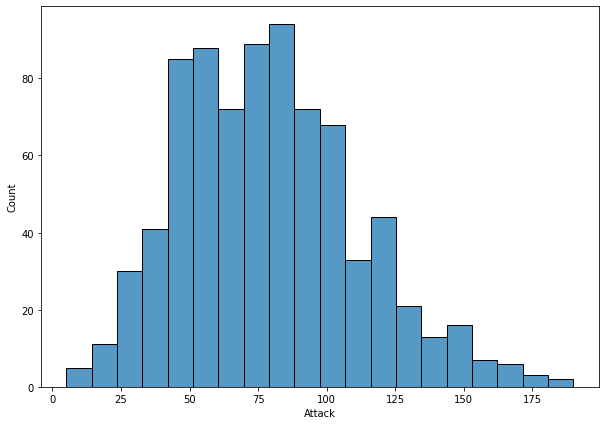

In [ ]:
# Basic histogram

plt.figure(figsize = (10, 7)) # define the size of the figure (width = 10, height = 7)

sns.histplot(data = df, x = 'Attack')

plt.show() # include this to avoid the plot object description written above the graph


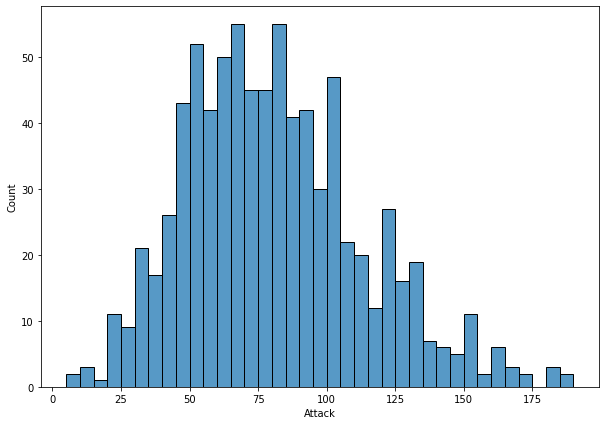

In [ ]:
# Change the width of bins either by using 'binwidth' or 'bins' arguments

# binwidth - the width of bins
# bins - the total number of bins

plt.figure(figsize = (10, 7))

sns.histplot(data = df, x = 'Attack', binwidth = 5)

plt.show()


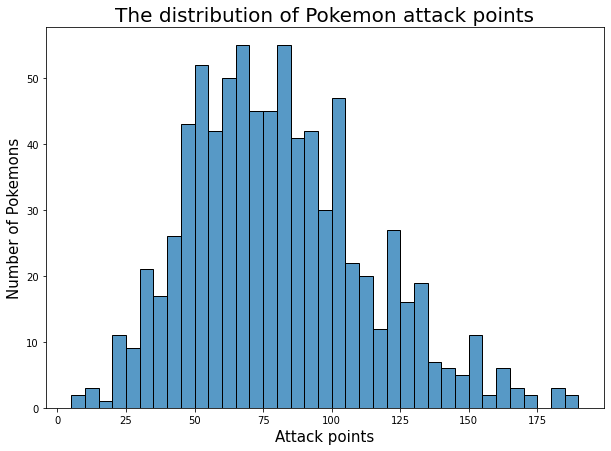

In [ ]:
# Adding plot title and specifying the axes labels

plt.figure(figsize = (10, 7))

sns.histplot(data = df, x = 'Attack', binwidth = 5)

plt.title('The distribution of Pokemon attack points', fontsize = 20) # plot title
plt.xlabel('Attack points', fontsize = 15) # X axis label
plt.ylabel('Number of Pokemons', fontsize = 15) # Y axis label

plt.show()


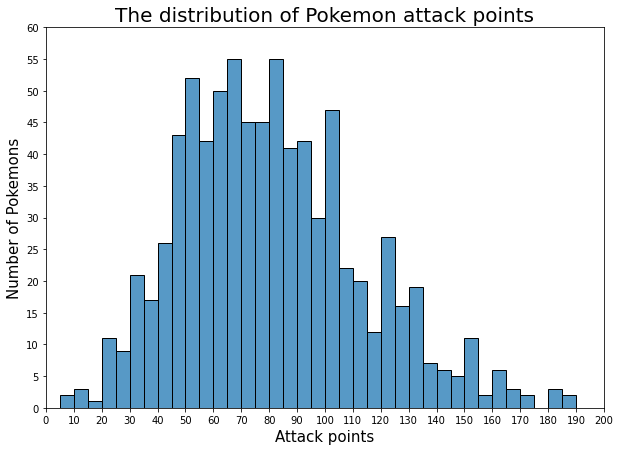

In [ ]:
# Manually changing the limits of X and Y axes, and setting axes breaks

plt.figure(figsize = (10, 7))

sns.histplot(data = df, x = 'Attack', binwidth = 5)

plt.title('The distribution of Pokemon attack points', fontsize = 20)
plt.xlabel('Attack points', fontsize = 15)
plt.ylabel('Number of Pokemons', fontsize = 15)

plt.xlim(0, 200)
plt.ylim(0, 60)

plt.xticks(ticks = np.arange(0, 210, 10))
plt.yticks(ticks = np.arange(0, 65, 5))

plt.show()

# try running np.arange(0, 210, 10) is a separate code cell and see what you get as an output


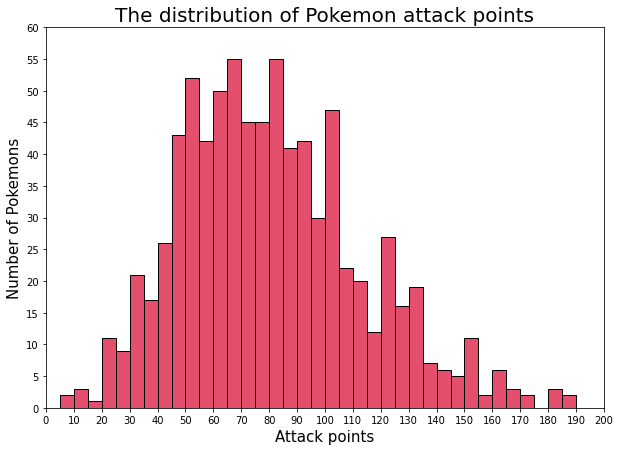

In [ ]:
# Change the color of bars

plt.figure(figsize = (10, 7))

sns.histplot(data = df, x = 'Attack', binwidth = 5, color = 'crimson')

plt.title('The distribution of Pokemon attack points', fontsize = 20)
plt.xlabel('Attack points', fontsize = 15)
plt.ylabel('Number of Pokemons', fontsize = 15)

plt.xlim(0, 200)
plt.ylim(0, 60)

plt.xticks(ticks = np.arange(0, 210, 10))
plt.yticks(ticks = np.arange(0, 65, 5))

plt.show()


List of colors avaiable in `matplotlib` / `seaborn`

<figure>
<left>
<img src=https://i.stack.imgur.com/lFZum.png width="600">
</figure>

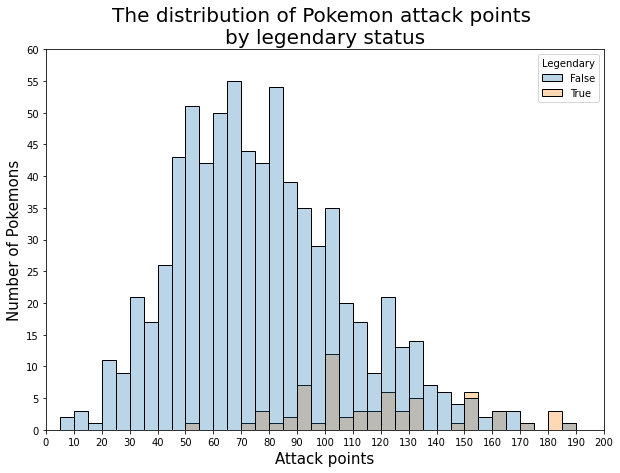

In [ ]:
# The powerful thing about visualizing data is that you can perform a group comparison
# by drawing multiple graphs on one plot

# Here I add a hue = 'Legendary' argument to the sns.histplot() command,
# asking seaborn to draw histograms separately for Legendary and Non-legendary pokemons

# Note that 'hue' argument overrides 'color' argument,
# so color = 'crimson' from previous plot is no longer valid and I delete it

# I also amend the plot title a bit to reflect what the graph is now showing

plt.figure(figsize = (10, 7))

sns.histplot(data = df,
             x = 'Attack',
             binwidth = 5,
             hue = 'Legendary',
             alpha = 0.3) # transparency ranges from 0 to 1 

plt.title('The distribution of Pokemon attack points \nby legendary status', fontsize = 20)
plt.xlabel('Attack points', fontsize = 15)
plt.ylabel('Number of Pokemons', fontsize = 15)

plt.xlim(0, 200)
plt.ylim(0, 60)

plt.xticks(ticks = np.arange(0, 210, 10))
plt.yticks(ticks = np.arange(0, 65, 5))

plt.show()


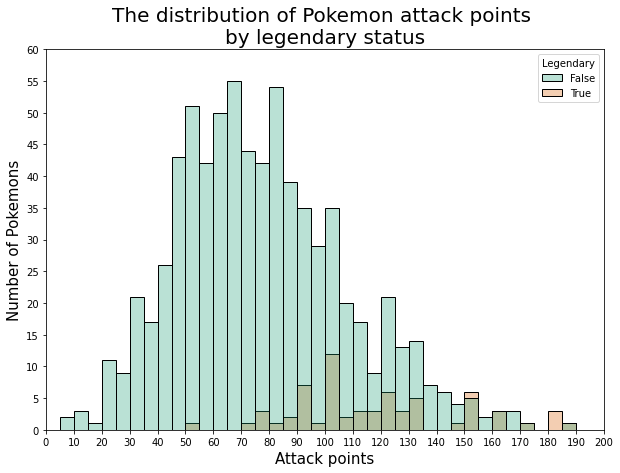

In [ ]:
# If you want to manually change the colors of the plot which uses 'hue' argument,
# use 'palette' argument

plt.figure(figsize = (10, 7))

sns.histplot(data = df,
             x = 'Attack',
             binwidth = 5,
             hue = 'Legendary',
             alpha = 0.3, # transparency ranges from 0 to 1 
             palette = 'Dark2') 

plt.title('The distribution of Pokemon attack points \nby legendary status', fontsize = 20)
plt.xlabel('Attack points', fontsize = 15)
plt.ylabel('Number of Pokemons', fontsize = 15)

plt.xlim(0, 200)
plt.ylim(0, 60)

plt.xticks(ticks = np.arange(0, 210, 10))
plt.yticks(ticks = np.arange(0, 65, 5))

plt.show()


`matplotlib` / `seaborn` color palettes available [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

### **Boxplot**

See more examples of `seaborn` boxplots [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

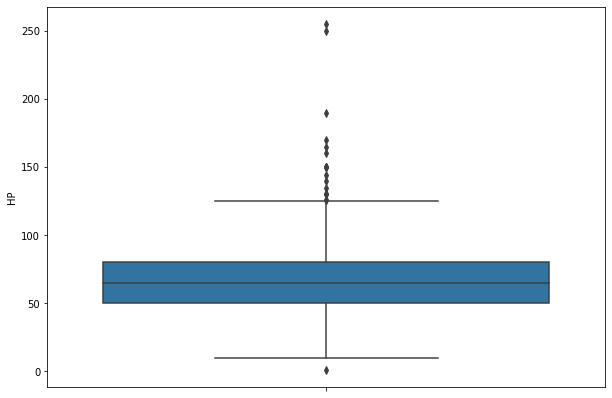

In [ ]:
# Basic boxplot

plt.figure(figsize = (10, 7))

sns.boxplot(data = df, y = 'HP') # you can also swop y for x

plt.show()


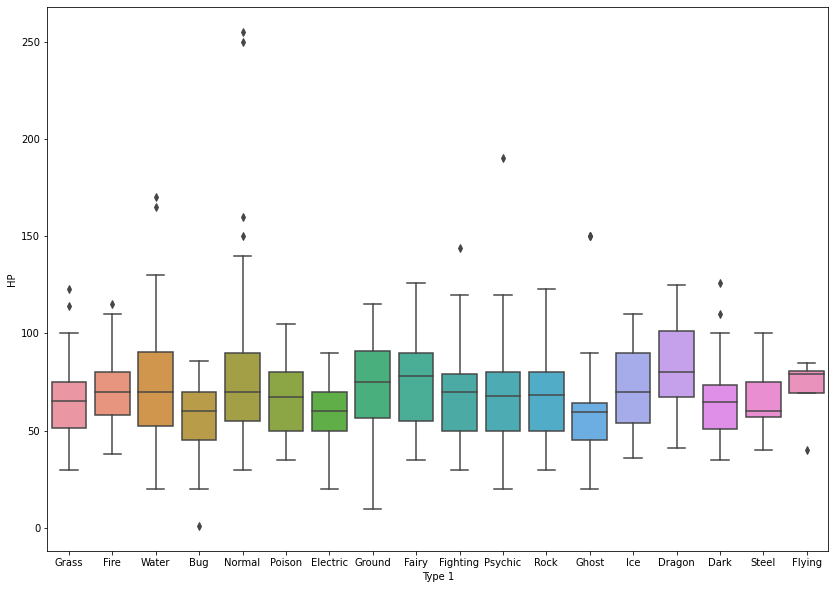

In [ ]:
# Boxplots are not very useful without group comparison.
# Let's add a variable of Pokemon type on the X axis

plt.figure(figsize = (14, 10))

sns.boxplot(data = df, x = 'Type 1', y = 'HP')

plt.show()


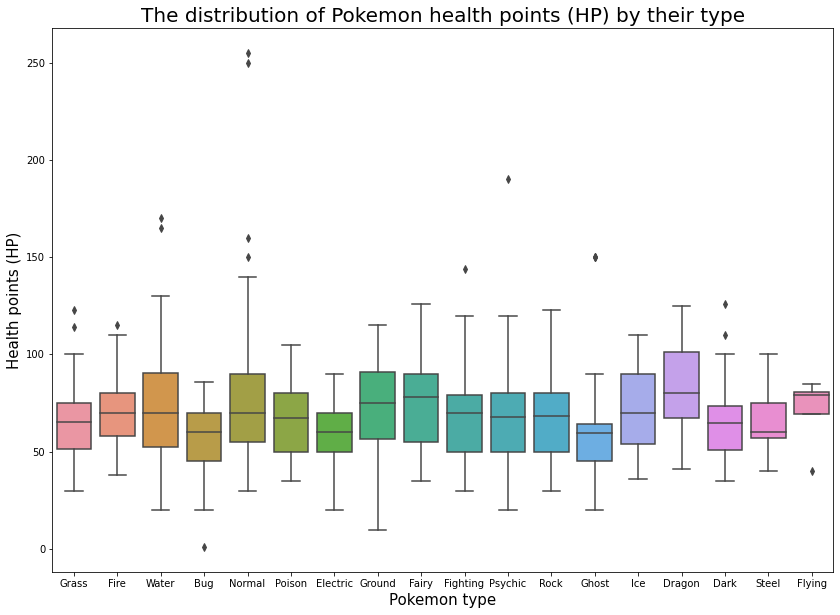

In [ ]:
# Adding plot title and specifying the axes labels

plt.figure(figsize = (14, 10))

sns.boxplot(data = df, x = 'Type 1', y = 'HP')

plt.title('The distribution of Pokemon health points (HP) by their type', fontsize = 20)
plt.xlabel('Pokemon type', fontsize = 15)
plt.ylabel('Health points (HP)', fontsize = 15)

plt.show()


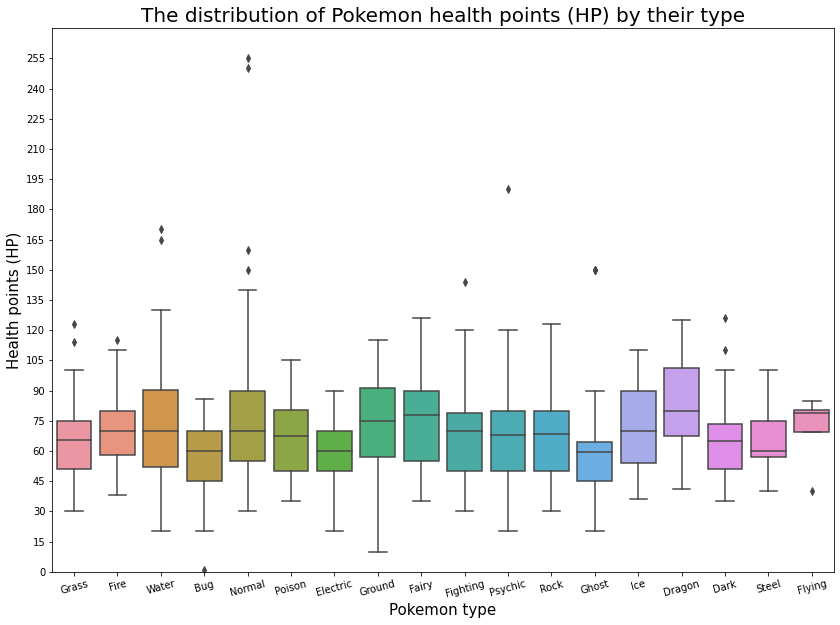

In [ ]:
# Tweak the X and Y axes

plt.figure(figsize = (14, 10))

sns.boxplot(data = df, x = 'Type 1', y = 'HP')

plt.title('The distribution of Pokemon health points (HP) by their type', fontsize = 20)
plt.xlabel('Pokemon type', fontsize = 15)
plt.ylabel('Health points (HP)', fontsize = 15)

plt.ylim(0, df['HP'].max() + 15) # from 0 to Max HP + 15

plt.xticks(rotation = 15) # add a bit of rotation to X ticks
plt.yticks(ticks = np.arange(0, df['HP'].max() + 15, 15)) # from 0 to Max HP + 15 by 15

plt.show()


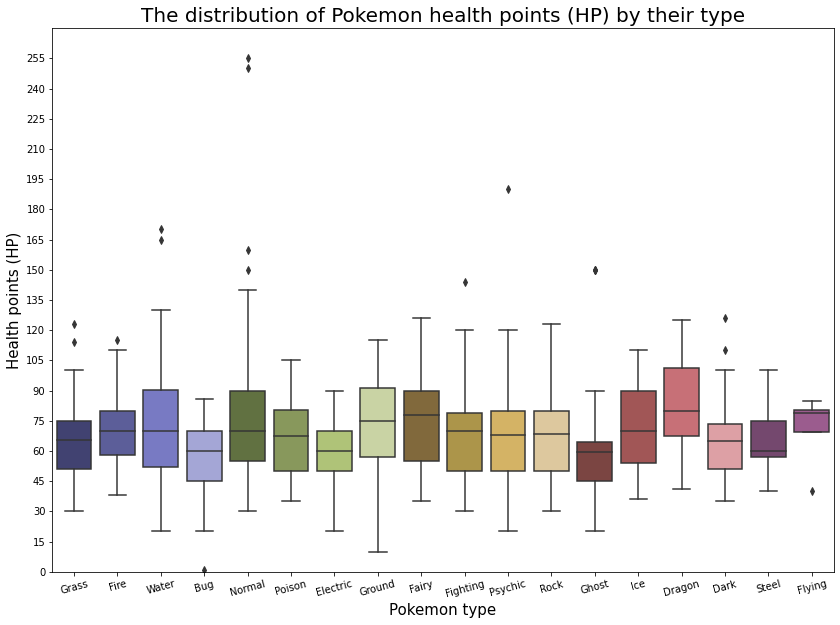

In [ ]:
# You can change the color palette if you wish

plt.figure(figsize = (14, 10))

sns.boxplot(data = df,
            x = 'Type 1',
            y = 'HP',
            palette = 'tab20b')

plt.title('The distribution of Pokemon health points (HP) by their type', fontsize = 20)
plt.xlabel('Pokemon type', fontsize = 15)
plt.ylabel('Health points (HP)', fontsize = 15)

plt.ylim(0, df['HP'].max() + 15)

plt.xticks(rotation = 15) # add a bit of rotation
plt.yticks(ticks = np.arange(0, df['HP'].max() + 15, 15))

plt.show()


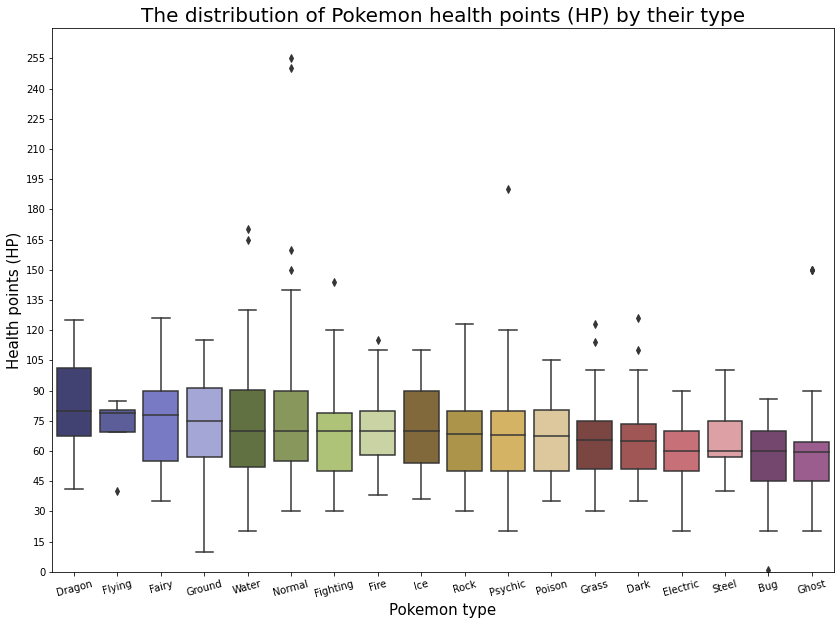

In [ ]:
# Lastly, you might want to arrange the types of Pokemons depending on their median HP value.

# This requires a few steps. Eventually, I create an object called desc_order
# in which I keep the types of Pokemons according to the median level of HP (from the highest one to the lowest one)

# As a first step to achieve this, I get the median values of HP for each Type of Pokemons: df.groupby('Type 1')['HP'].median()
# Then I sort the outcome vector in the descending order via .sort_values(ascending = False)
# And lastly, I take only the indeces (that is, Pokemon names) out of the arranged vector

# desc_order then goes into the 'order' argument of sns.boxplot()

desc_order = df.groupby('Type 1')['HP'].median().sort_values(ascending = False).index

plt.figure(figsize = (14, 10))

sns.boxplot(data = df,
            x = 'Type 1',
            y = 'HP',
            palette = 'tab20b',
            order = desc_order) # arrange by median values

plt.title('The distribution of Pokemon health points (HP) by their type', fontsize = 20)
plt.xlabel('Pokemon type', fontsize = 15)
plt.ylabel('Health points (HP)', fontsize = 15)

plt.ylim(0, df['HP'].max() + 15)

plt.xticks(rotation = 15)
plt.yticks(ticks = np.arange(0, df['HP'].max() + 15, 15))

plt.show()


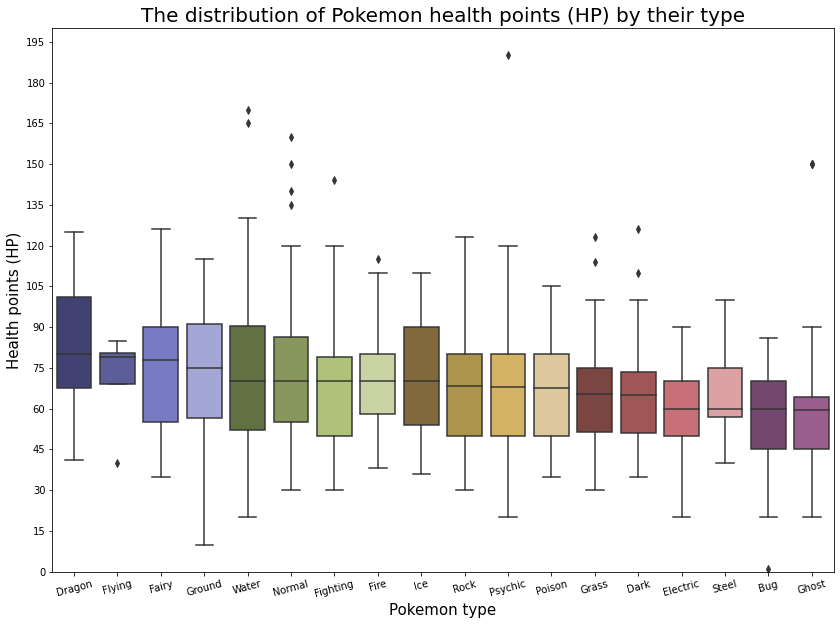

In [ ]:
# There are clearly two Pokemon outliers among the Normal type that score extremely high on the HP variable
# compared to other Pokemons

# Their HP values are around 255, so let me keep only those Pokemons that score less than 200,
# and see if it makes the graph prettier

# You can subset data right within the sns.boxpot() command

desc_order = df.groupby('Type 1')['HP'].median().sort_values(ascending = False).index

plt.figure(figsize = (14, 10))

sns.boxplot(data = df[df['HP'] < 200], # note than now instead of data = df, it's data = df[df['HP'] < 200
            x = 'Type 1',
            y = 'HP',
            palette = 'tab20b',
            order = desc_order)

plt.title('The distribution of Pokemon health points (HP) by their type', fontsize = 20)
plt.xlabel('Pokemon type', fontsize = 15)
plt.ylabel('Health points (HP)', fontsize = 15)

plt.ylim(0, 200) # and I change the upper limit of Y scale accordingly

plt.xticks(rotation = 15)
plt.yticks(ticks = np.arange(0, 200, 15)) # and Y ticks as well

plt.show()


### **Scatterplot**

See more examples of `seaborn` scatterplots [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

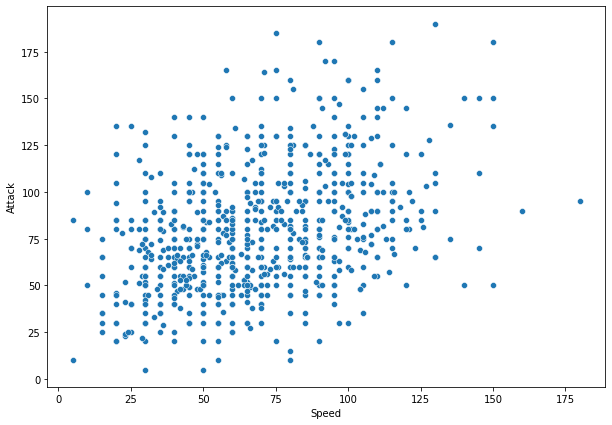

In [ ]:
# Basic scatterplot

plt.figure(figsize = (10, 7))

sns.scatterplot(data = df, x = 'Speed', y = 'Attack')

plt.show()


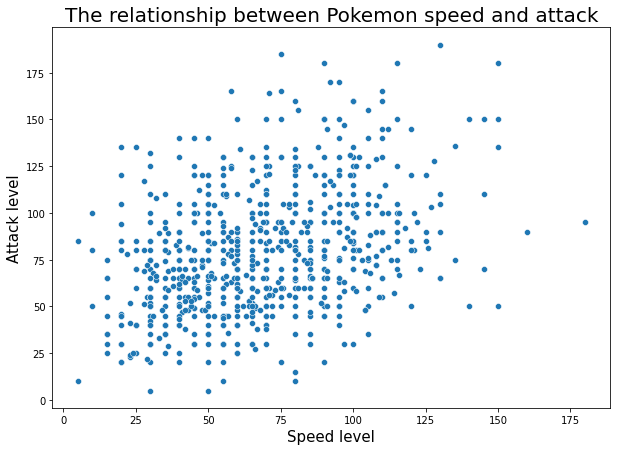

In [ ]:
# Adding plot title and specifying the axes labels

plt.figure(figsize = (10, 7))

sns.scatterplot(data = df, x = 'Speed', y = 'Attack')

plt.title('The relationship between Pokemon speed and attack', fontsize = 20)
plt.xlabel('Speed level', fontsize = 15)
plt.ylabel('Attack level', fontsize = 15)

plt.show()


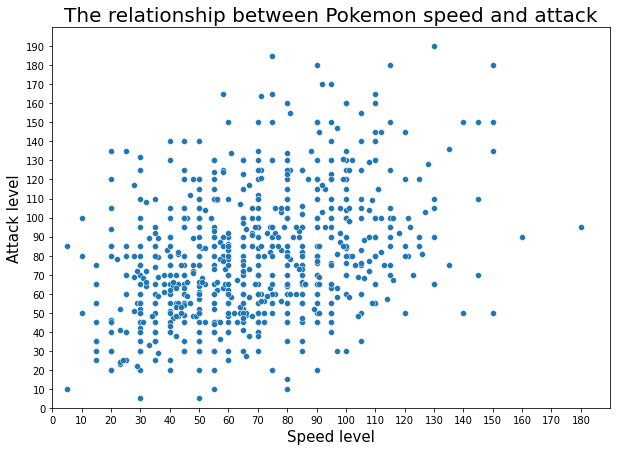

In [ ]:
# Manually changing the limits of X and Y axes, and setting axes breaks

plt.figure(figsize = (10, 7))

sns.scatterplot(data = df, x = 'Speed', y = 'Attack')

plt.title('The relationship between Pokemon speed and attack', fontsize = 20)
plt.xlabel('Speed level', fontsize = 15)
plt.ylabel('Attack level', fontsize = 15)

plt.xlim(0, df['Speed'].max() + 10)
plt.ylim(0, df['Attack'].max() + 10)

plt.xticks(ticks = np.arange(0, 190, 10))
plt.yticks(ticks = np.arange(0, 200, 10))

plt.show()


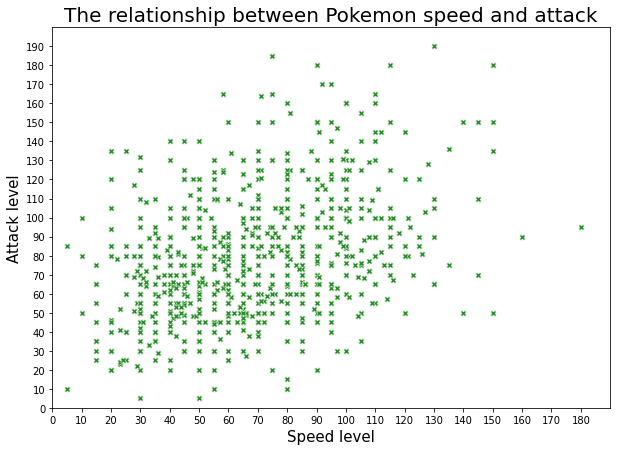

In [ ]:
# Changing color of dots, decreasing their size, and changing the type of marker

plt.figure(figsize = (10, 7))

sns.scatterplot(data = df,
                x = 'Speed',
                y = 'Attack',
                s = 35, # make points a bit smaller
                marker = 'X', # available markers: https://matplotlib.org/stable/api/markers_api.html
                color = 'forestgreen') # change the color of points

plt.title('The relationship between Pokemon speed and attack', fontsize = 20)
plt.xlabel('Speed level', fontsize = 15)
plt.ylabel('Attack level', fontsize = 15)

plt.xlim(0, df['Speed'].max() + 10)
plt.ylim(0, df['Attack'].max() + 10)

plt.xticks(ticks = np.arange(0, 190, 10))
plt.yticks(ticks = np.arange(0, 200, 10))

plt.show()


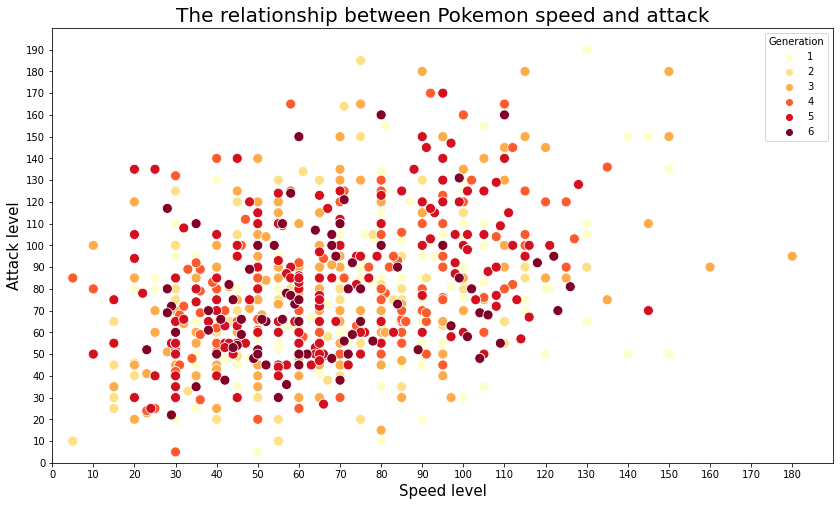

In [ ]:
# Now let's split the scatterplot by Pokemon generation and see if we can identify any patterns

plt.figure(figsize = (14, 8))

sns.scatterplot(data = df,
                x = 'Speed',
                y = 'Attack',
                s = 100,
                hue = 'Generation', # note that since hue is introduced, we don't need 'color' argument any more
                palette = 'YlOrRd') # changing colormap

plt.title('The relationship between Pokemon speed and attack', fontsize = 20)
plt.xlabel('Speed level', fontsize = 15)
plt.ylabel('Attack level', fontsize = 15)

plt.xlim(0, df['Speed'].max() + 10)
plt.ylim(0, df['Attack'].max() + 10)

plt.xticks(ticks = np.arange(0, 190, 10))
plt.yticks(ticks = np.arange(0, 200, 10))

plt.show()


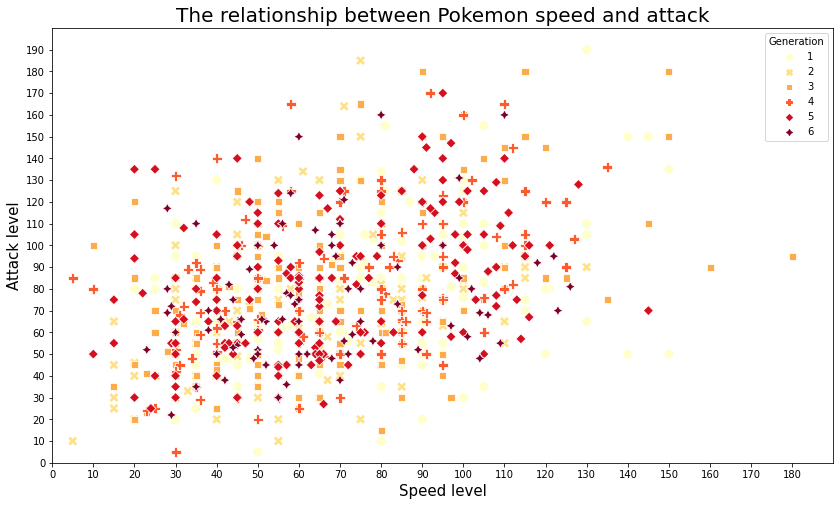

In [ ]:
# You can assign more than one property of the graph to the variable,
# i.e. say both color and type of marker will be dependent on Pokemon's generation

plt.figure(figsize = (14, 8))

sns.scatterplot(data = df,
                x = 'Speed',
                y = 'Attack',
                s = 100,
                hue = 'Generation', # note that since hue is introduced, we don't need color argument any more
                palette = 'YlOrRd', # changing colormap
                style = 'Generation')

plt.title('The relationship between Pokemon speed and attack', fontsize = 20)
plt.xlabel('Speed level', fontsize = 15)
plt.ylabel('Attack level', fontsize = 15)

plt.xlim(0, df['Speed'].max() + 10)
plt.ylim(0, df['Attack'].max() + 10)

plt.xticks(ticks = np.arange(0, 190, 10))
plt.yticks(ticks = np.arange(0, 200, 10))

plt.show()


## **2.2 Categorical variables**

### **Count plot (Bar chart)**

See more examples of `seaborn` count plots [here](https://seaborn.pydata.org/generated/seaborn.countplot.html).


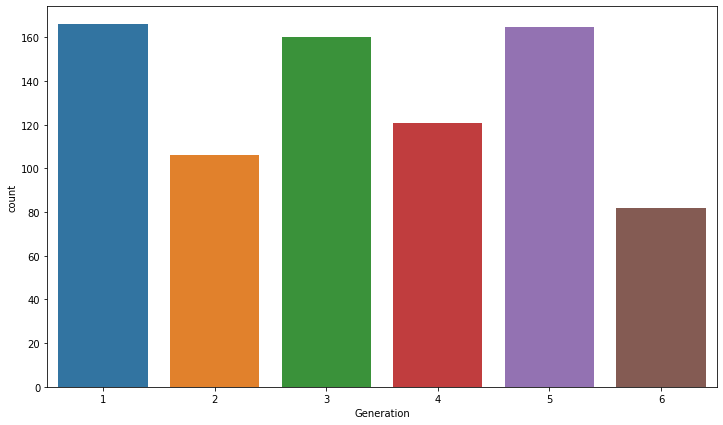

In [ ]:
# Basic count plot

plt.figure(figsize = (12, 7))

sns.countplot(data = df, x = 'Generation')

plt.show()


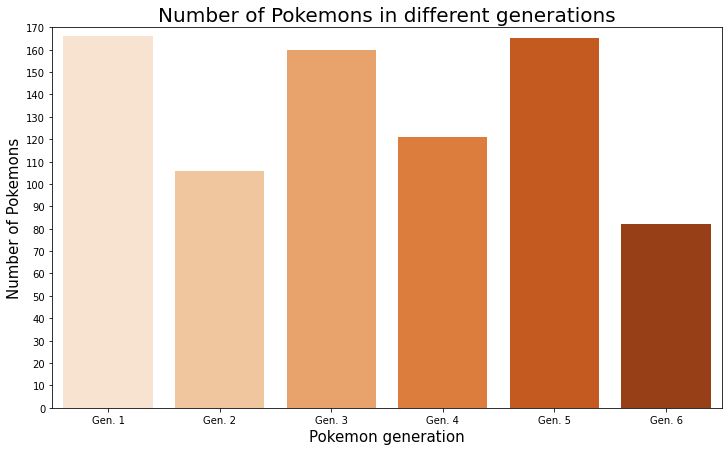

In [ ]:
# Basic count plot

# Adding axes labels, plot title, and tweaking X and Y scales, changing color palette

plt.figure(figsize = (12, 7))

sns.countplot(data = df, x = 'Generation', palette = 'Oranges')

plt.title('Number of Pokemons in different generations', fontsize = 20)
plt.xlabel('Pokemon generation', fontsize = 15)
plt.ylabel('Number of Pokemons', fontsize = 15)

plt.ylim(0, 170)
plt.yticks(np.arange(0, 180, 10))

# You can manually change the names of X ticks too if you wish
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], # positions of bars
           labels = ['Gen. 1', 'Gen. 2', 'Gen. 3', 'Gen. 4', 'Gen. 5', 'Gen. 6']) # new labels

plt.show()


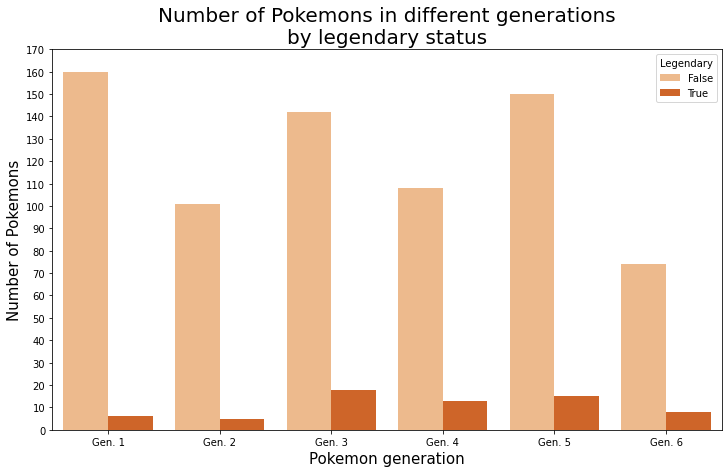

In [ ]:
# Subsetting graph by Legendary status via 'hue' argument

plt.figure(figsize = (12, 7))

sns.countplot(data = df,
              x = 'Generation',
              palette = 'Oranges',
              hue = 'Legendary')

plt.title('Number of Pokemons in different generations\nby legendary status', fontsize = 20)
plt.xlabel('Pokemon generation', fontsize = 15)
plt.ylabel('Number of Pokemons', fontsize = 15)

plt.ylim(0, 170)
plt.yticks(np.arange(0, 180, 10))

# You can manually change the names of X ticks too if you wish
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], # positions of bars
           labels = ['Gen. 1', 'Gen. 2', 'Gen. 3', 'Gen. 4', 'Gen. 5', 'Gen. 6']) # new labels

plt.show()


### **Stacked bar chart**



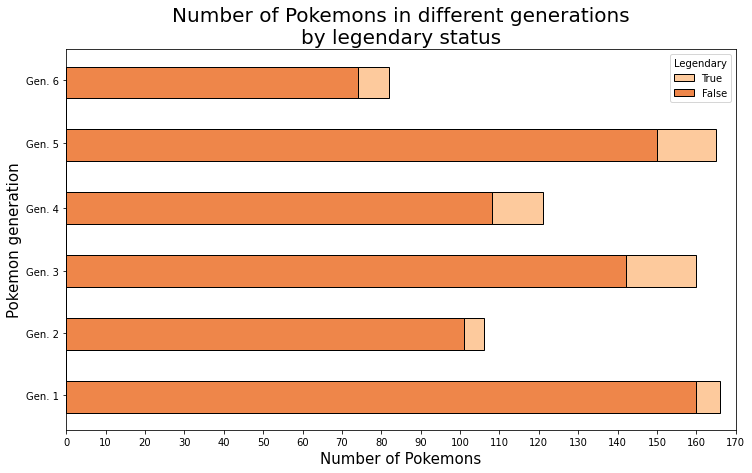

In [ ]:
# Lifehack: use sns.histplot() with multiple = 'stack' argument

plt.figure(figsize = (12, 7))

sns.histplot(data = df, y = 'Generation',
             hue = 'Legendary',
             multiple = 'stack', # stack Legendary and Non-Legendary Pokemons
             palette = 'Oranges',
             hue_order = [True, False]) # changing the order of hue categoriess

plt.title('Number of Pokemons in different generations\nby legendary status', fontsize = 20)
plt.xlabel('Number of Pokemons', fontsize = 15)
plt.ylabel('Pokemon generation', fontsize = 15)

plt.xlim(0, 170)
plt.xticks(np.arange(0, 180, 10))

plt.yticks(ticks = [1.25, 2.15, 3.05, 3.95, 4.9, 5.80],
           labels = ['Gen. 1', 'Gen. 2', 'Gen. 3', 'Gen. 4', 'Gen. 5', 'Gen. 6'])

plt.show()


## **2.3 Visualizing aggregated analysis**

### **Bar plot**

A **bar plot** represents **an estimate of central tendency** for a numeric variable with the **height of each rectangle** and provides some indication of the **uncertainty** around that estimate using **error bars**.

See more examples of `seaborn` bar plots [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).


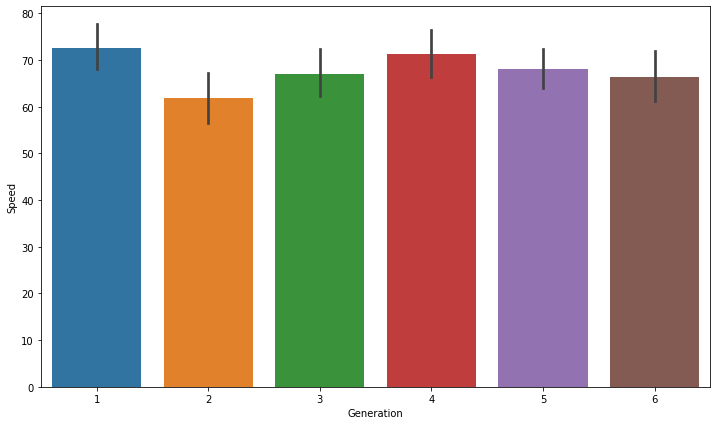

In [ ]:
# Say we want to plot a mean value of Speed for each Generation of Pokemons

# Basic bar plot

plt.figure(figsize = (12, 7))

sns.barplot(data = df, x = 'Generation', y = 'Speed')

plt.show()

# You can get the exact values of bar height from the aggregated analysis code below: 
# I.e. get the mean speed level for Pokemons in different generations
# df.groupby('Generation')['Speed'].mean()


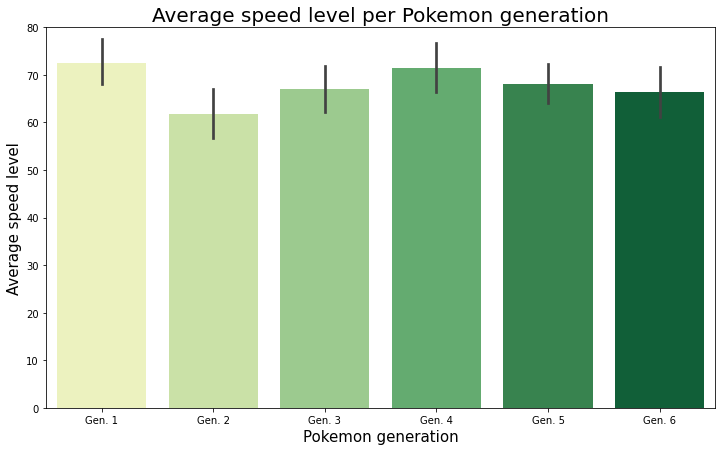

In [ ]:
# Say we want to plot a mean value of Speed for each Generation of Pokemons

# Adding title and axes labels, tweaking X and Y axes, changing color palette

plt.figure(figsize = (12, 7))

sns.barplot(data = df,
            x = 'Generation',
            y = 'Speed',
            palette = 'YlGn')

plt.title('Average speed level per Pokemon generation', fontsize = 20)
plt.xlabel('Pokemon generation', fontsize = 15)
plt.ylabel('Average speed level', fontsize = 15)

plt.ylim(0, 80)
plt.yticks(np.arange(0, 90, 10))

plt.xticks(ticks = [0, 1, 2, 3, 4, 5],
           labels = ['Gen. 1', 'Gen. 2', 'Gen. 3', 'Gen. 4', 'Gen. 5', 'Gen. 6'])

plt.show()


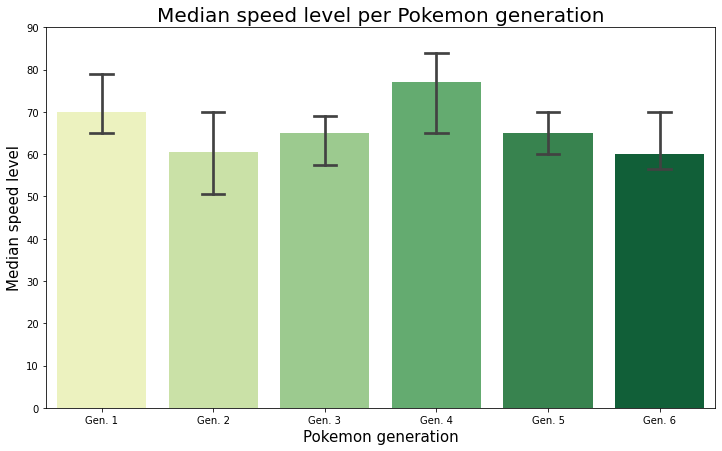

In [ ]:
# Mean is a default estimator for sns.barplot() but you can override it and calculate median or other statistic instead

plt.figure(figsize = (12, 7))

sns.barplot(data = df,
            x = 'Generation',
            y = 'Speed',
            palette = 'YlGn',
            estimator = np.median, # use numpy median fucntion instead of default mean
            capsize = 0.2) # add caps to the confidence interval boundaries

plt.title('Median speed level per Pokemon generation', fontsize = 20)
plt.xlabel('Pokemon generation', fontsize = 15)
plt.ylabel('Median speed level', fontsize = 15)

plt.ylim(0, 90)
plt.yticks(np.arange(0, 100, 10))

plt.xticks(ticks = [0, 1, 2, 3, 4, 5],
           labels = ['Gen. 1', 'Gen. 2', 'Gen. 3', 'Gen. 4', 'Gen. 5', 'Gen. 6'])

plt.show()

# You can get the exact values of bar height from the aggregated analysis code below: 
# I.e. get the median speed level for Pokemons in different generations
# df.groupby('Generation')['Speed'].median()


## **Exercise**

Alright, it's time to practice!


In [ ]:
# Let's upload the mtcars dataset into the current Google Colab session

from google.colab import files

uploaded = files.upload()


Saving mtcars.csv to mtcars.csv


In [ ]:
# And save it as an mtcars object

mtcars = pd.read_csv('mtcars.csv')

mtcars.head(10)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
# Here is the description of the dataset

# Motor Trend Car Road Tests data
# The data was extracted from the 1974 Motor Trend US magazine,
# and comprises fuel consumption and 10 aspects of automobile design and performance
# for 32 automobiles (1973–74 models).

# mpg - Miles/(US) gallon
# cyl - Number of cylinders
# disp - Displacement (cu.in.)
# hp - Gross horsepower
# drat - Rear axle ratio
# wt - Weight (1000 lbs)
# qsec - 1/4 mile time
# vs - Engine (0 = V-shaped, 1 = straight)
# am - Transmission (0 = automatic, 1 = manual)
# gear - Number of forward gears
# carb - Number of carburetors


Using the `mtcars` dataset, please draw the following graphs (and make them as clear and pretty as possible):

+ **Histogram** of **displacement** for cars with V-shaped and straight **engines**
+ **Boxplot** of **gross horsepower** for cars with different number of **cylinders**
+ **Scatterplot** of **weight** and **1/4 mile time** for cars with automatic and manual **transimission**
+ **Count plot** of number of **carburetors**
+ **Bar plot** of average **miles per gallon** for cars with different number of **forward gears**


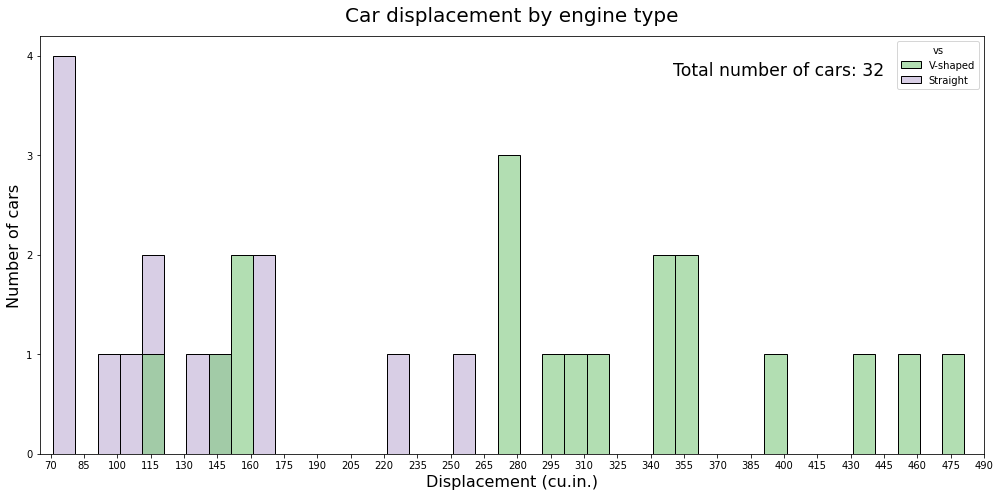

In [ ]:
# Histogram of displacement for cars with V-shaped and straight engines

# Replace 0 and 1 in the vs variable with respective types of engines

mtcars['vs'].replace([0, 1], ['V-shaped', 'Straight'], inplace = True)

# Get some statistics used in plotting

mtcars['disp'].min() # 71.1
mtcars['disp'].max() # 472
n_cars = len(mtcars['disp']) # 32 - total number of cars

# Plot the graph

plt.figure(figsize = (14, 7),
           tight_layout = True)

sns.histplot(data = mtcars,
             x = 'disp',
             hue = 'vs',
             binwidth = 10,
             alpha = 0.6,
             palette = 'Accent')

plt.title('Car displacement by engine type', fontsize = 20, y = 1.02)
plt.xlabel('Displacement (cu.in.)', fontsize = 16)
plt.ylabel('Number of cars', fontsize = 16)

plt.xlim(65, 490)

plt.xticks(ticks = np.arange(70, 495, 15))
plt.yticks(ticks = np.arange(0, 5, 1))

plt.text(x = 350, y = 3.8, s = f'Total number of cars: {n_cars}', fontdict = {'fontsize' : 'xx-large'})

plt.show()


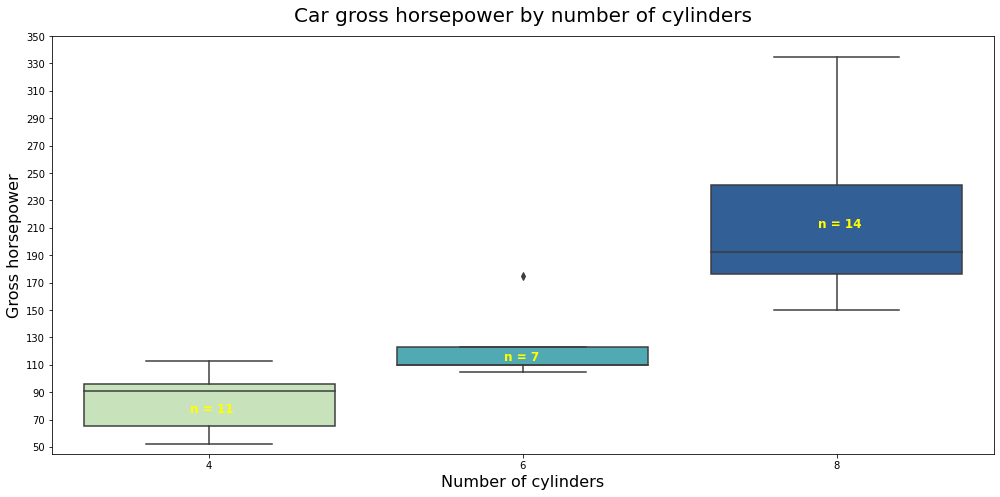

In [ ]:
# Boxplot of gross horsepower for cars with different number of cylinders

mtcars['hp'].min() # 52
mtcars['hp'].max() # 335

# Getting the number of observations in each group:

n_4_cyl = len(mtcars.loc[mtcars['cyl'] == 4, 'cyl'])
n_6_cyl = len(mtcars.loc[mtcars['cyl'] == 6, 'cyl'])
n_8_cyl = len(mtcars.loc[mtcars['cyl'] == 8, 'cyl'])

# Plot the graph

plt.figure(figsize = (14, 7),
           tight_layout = True)

sns.boxplot(data = mtcars,
            x = 'cyl',
            y = 'hp',
            palette = 'YlGnBu')

plt.title('Car gross horsepower by number of cylinders', fontsize = 20, y = 1.02)
plt.xlabel('Number of cylinders', fontsize = 16)
plt.ylabel('Gross horsepower', fontsize = 16)

plt.ylim(45, 350)

plt.yticks(ticks = np.arange(50, 370, 20))

plt.text(x = -0.06, y = 75, s = f'n = {n_4_cyl}', color = 'yellow', weight = 'semibold', size = 'large')
plt.text(x = 0.94, y = 113, s = f'n = {n_6_cyl}', color = 'yellow', weight = 'semibold', size = 'large')
plt.text(x = 1.94, y = 210, s = f'n = {n_8_cyl}', color = 'yellow', weight = 'semibold', size = 'large')

plt.show()


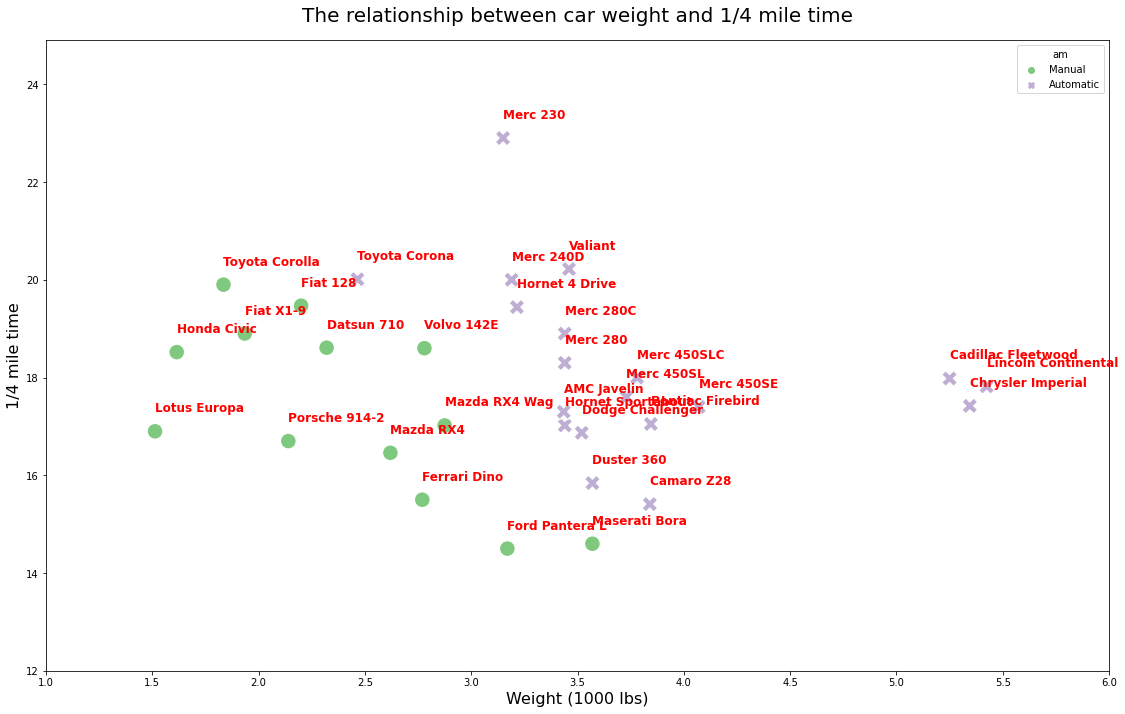

In [ ]:
# Scatterplot of weight and 1/4 mile time for cars with automatic and manual transimission

# Replace 0 and 1 in the am variable with respective types of transmission

mtcars['am'].replace([0, 1], ['Automatic', 'Manual'], inplace = True)

# Plot the graph

plt.figure(figsize = (16, 10),
           tight_layout = True)

sns.scatterplot(data = mtcars,
            x = 'wt',
            y = 'qsec',
            hue = 'am',
            style = 'am',
            s = 250,
            palette = 'Accent')

plt.title('The relationship between car weight and 1/4 mile time', fontsize = 20, y = 1.02)
plt.xlabel('Weight (1000 lbs)', fontsize = 16)
plt.ylabel('1/4 mile time', fontsize = 16)

plt.ylim(mtcars['qsec'].min() - 2, mtcars['qsec'].max() + 2)
plt.xlim(mtcars['wt'].min() - 0.5, mtcars['wt'].max() + 0.5)

plt.yticks(ticks = np.arange(12, 26, 2))
plt.xticks(ticks = np.arange(1, 6.5, 0.5))

# Adding labels to the points (I took the code from stackoverflow and adjusted to my variables and dataset)

for n in range(0, mtcars.shape[0]):
     plt.text(x = mtcars['wt'][n],
              y = mtcars['qsec'][n] + 0.4,
              s = mtcars['model'][n],
              horizontalalignment='left', 
              size='large',
              color='red',
              weight='semibold')

plt.show()


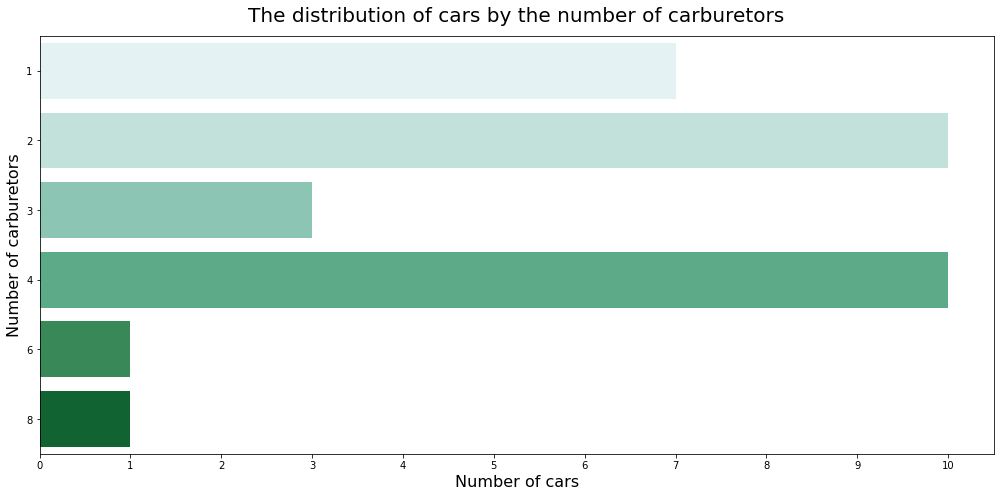

In [ ]:
# Count plot of number of carburetors

# Plot the graph

plt.figure(figsize = (14, 7),
           tight_layout = True)

sns.countplot(data = mtcars,
              y = 'carb',
              palette = 'BuGn')
            
plt.title('The distribution of cars by the number of carburetors', fontsize = 20, y = 1.02)
plt.xlabel('Number of cars', fontsize = 16)
plt.ylabel('Number of carburetors', fontsize = 16)

plt.xticks(ticks = np.arange(0, 11, 1))

plt.show()


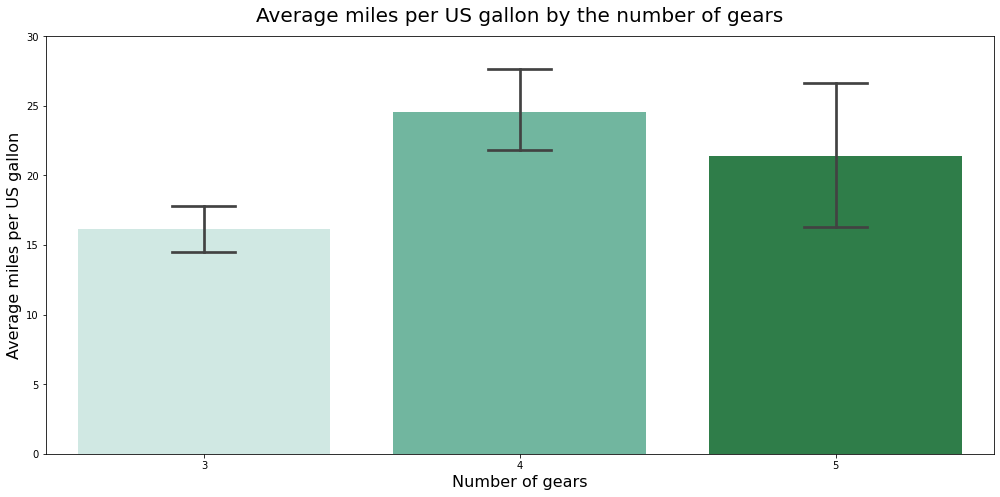

In [ ]:
# Bar plot of average miles per gallon for cars with different number of forward gears

# Plot the graph

plt.figure(figsize = (14, 7),
           tight_layout = True)

sns.barplot(data = mtcars,
            x = 'gear',
            y = 'mpg',
            palette = 'BuGn',
            capsize = 0.2)

plt.title('Average miles per US gallon by the number of gears', fontsize = 20, y = 1.02)
plt.xlabel('Number of gears', fontsize = 16)
plt.ylabel('Average miles per US gallon', fontsize = 16)

plt.yticks(ticks = np.arange(0, 35, 5))

plt.show()


---

# **That's the end of Day 4!**
